In [71]:
import pandas as pd
product_df = pd.read_json("data/products_table_clean.json")


In [72]:
def remove_price_outliers(df, min_value= 0, max_value= 1000):
    df = df[df["price"] > min_value]
    df = df[df["price"] < max_value]
    return df

In [73]:
product_df = remove_price_outliers(product_df)

I need to drop unused categories as well as one of the dummies categories (so they are linearly independent)

In [74]:
product_df.drop(["id","product_name","category", "product_description","location","page_id","create_time", "main_category","main_category_appliances"	],axis=1, inplace=True)

In [75]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 1 to 8090
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   price                                        6777 non-null   float64
 1   longitude                                    6777 non-null   float64
 2   latitude                                     6777 non-null   float64
 3   main_category_baby_kids_stuff                6777 non-null   int64  
 4   main_category_clothes_footwear_accessories   6777 non-null   int64  
 5   main_category_computers_software             6777 non-null   int64  
 6   main_category_diy_tools_materials            6777 non-null   int64  
 7   main_category_health_beauty                  6777 non-null   int64  
 8   main_category_home_garden                    6777 non-null   int64  
 9   main_category_music_films_books_games        6777 non-null   int64  
 10  

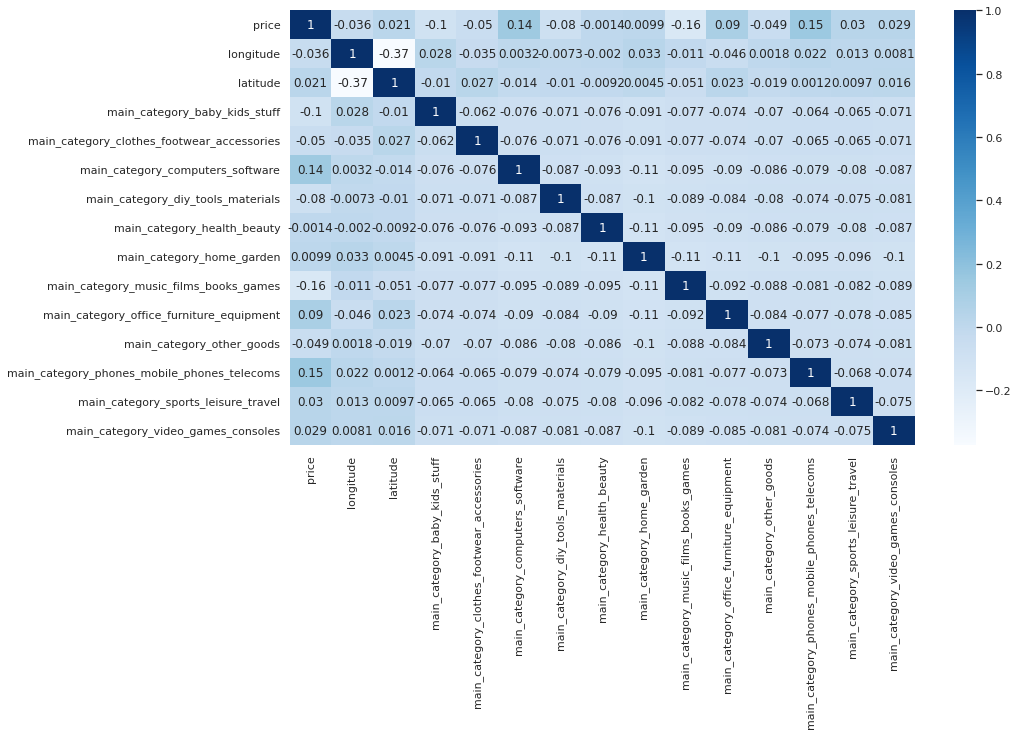

In [76]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
corr = product_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")


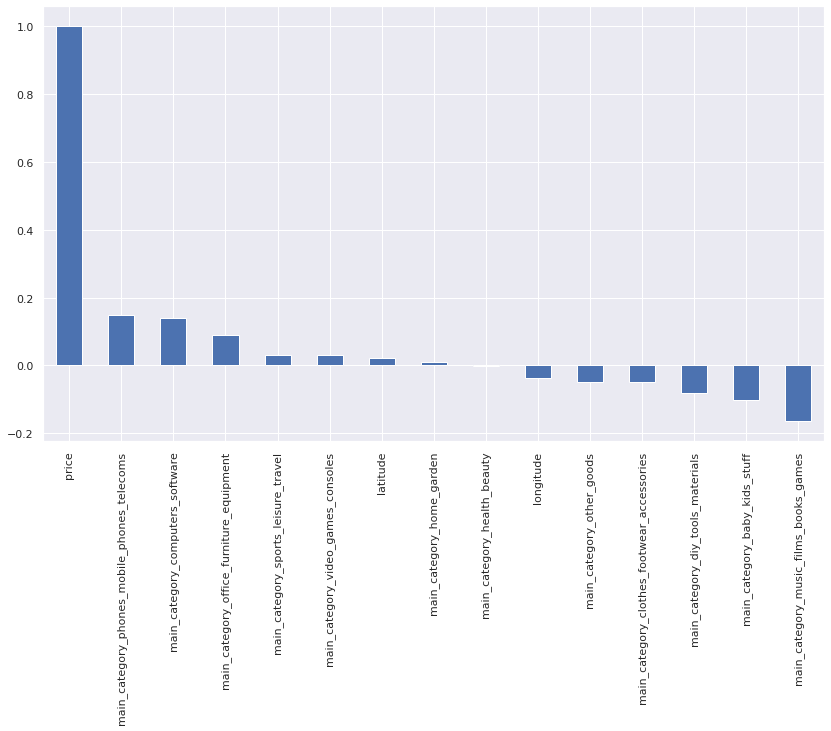

In [77]:
plt.figure(figsize=(14,8))
bars = product_df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

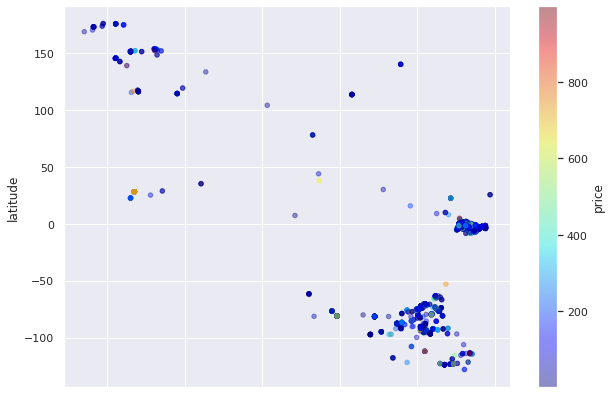

In [78]:
product_df.plot(
    x='longitude', y='latitude',
    kind='scatter', figsize=(10,7),
    alpha=.4,
    c='price', cmap=plt.get_cmap('jet'), colorbar=True
)



# Linear regression model starts here

In [79]:
X = product_df.drop(["price"], axis=1)
y = product_df["price"]

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_std, y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test_std)

In [84]:
from sklearn.metrics import mean_squared_error

mse_base = mean_squared_error(y_test, y_pred)
print(mse_base)

30476.935273585295


Below is a graph showing the actual value compared to the actual value.

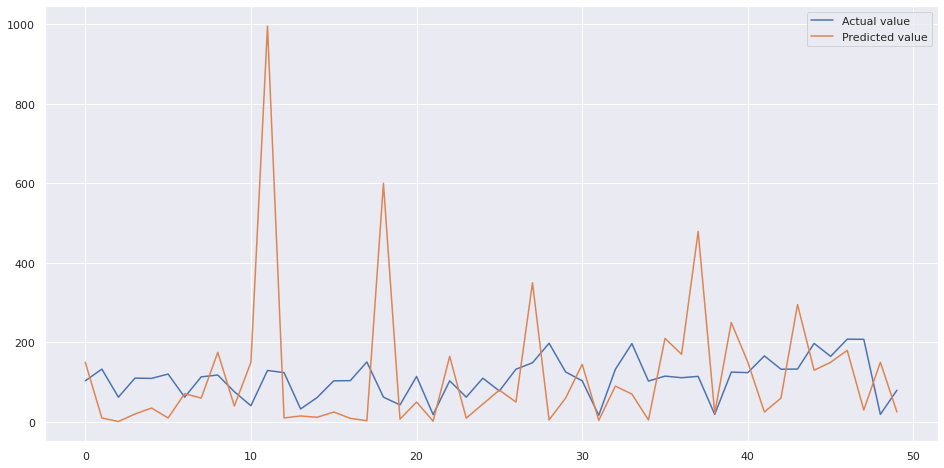

In [85]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


# Create a function to score the model

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# Implement a Grid Search for Lasso

In [86]:
LinearRegression.get_params()

TypeError: BaseEstimator.get_params() missing 1 required positional argument: 'self'